## A brief comparision between KKZ and K-Means methods - Part I

Between clustering and segmentation unsupervised techniques, k-means algorithm has been extensively studied and applied in literature. The k-means main target is to define a set of k groups through maximizing the variability between groups and minimizing the variability within groups. 

Clustering techniques has been applyed in some weather and clima problems where k-means showns himself as the most popular tool. The standard issue in these studies is to select representative elements in an model's ensemble aiming to select just a small subset holding the the same properts of full set of models.

According some studies [1], k-means shows some disadvantages when applied in this context. The k-means method tends to select members that are representative of high-density regions in climate space ignoring others, when a desirable outcome would be to produce a subset of members representing the spread of the possible outcomes without "concentration". 

For this case, the proposed solution was the KKZ method [2].  The method has been applied as a seeding method for k-means and is an interesting alternative for climate changes studies once it can recursively selects members that best span the spread of an ensemble rather than finding clusters that best characterize high-density.



## The dataset

Lets create an dataset for ilustrate the methods differences. Using python libraries numpy, scipy and skalearn. Our objective here is to create a data set with 200 random elements in the interval $[-1.0, \dots, 1.0]$ as a dataset for elements representing, for example, temperature and preciptation measurements over a region,

In [6]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import numpy as np
import scipy, pylab
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_blobs
   
dim = 2
nx = 150
ny = 1
metric = "euclidean"
seed = 1
k = 6
sample_size = 200

# This produces a numpy type from make_blobs
data = np.array(make_blobs(n_samples=sample_size,
                  n_features=dim,
                  centers=4,
                  cluster_std=1,
                  center_box=(-1.0, 1.0),
                  shuffle=True,
                  random_state=seed)[0])  # For reproducibility

In [7]:
data[1:10]

array([[-0.83661828,  0.81821277],
       [-0.28918621, -0.03055216],
       [-2.03843988, -2.57601137],
       [-0.34480386, -1.13497598],
       [ 0.14967896, -1.58155223],
       [ 0.34697383,  0.14255615],
       [-1.28326634,  0.67506468],
       [-0.3401562 , -1.85991219],
       [-1.11021828, -1.01269692]])

## KKZ algorithm

The Katsavounidis–Kuo–Zhang (KKZ) algorithm shows interesting behaviour when compared with K-Means. Its application recursively selects members that best span the spread of an ensemble rather than finding clusters that best characterize high-density as K-means. It does that in a deterministic way by incrementally adding scenarios to the ones previously selected.

#### KKZ algorithm

1. Select the case that lies closest to the data centroid $c = \frac{1}{N} \sum_{i=0}^{N} a_i$ as the first scenario.
2. Select the case that lies farthest from the first scenario as the second scenario.
3. To select the next scenario,

    3.1 calculate distances from each remaining case to the previously selected scenarios;
    
    3.2 associate each remaining case with the minimum distance calculated in step 3(i);
    
    3.3 select the case with the maximum distance from step 3.2 as the next scenario.
4. Repeat from step 3


A possible Python implementation for former described algorithme is as follows:

In [68]:

def kkz(data, k, metric = 'euclidian'):

    # x is our data set
    x = data
    
    # Centroids to be filled by kkz method. Dimension of k x 2 
    cent = np.empty([k, 2], dtype=float)

    # Step 0. Initialize 
    y = np.ndarray.mean(x, axis=0, keepdims=True)
    dist = cdist( y, x, metric=metric )  # -> (nx, ny) distances
    idx = dist.argmax()
    cent[0] = np.matrix(x[idx], dtype=float)
    x = np.delete(x, idx, axis=0)

    # Gets the maximum distance elements for k elements
    for i in range(1,k):
        dist = cdist(x, cent, metric=metric ) # returns x and y distance by metric
        idx = np.mean(dist, 1).argmax()
        cent[i] = np.matrix(x[idx], dtype=float)
        x = np.delete(x, idx, axis=0) # removes selected element from left points

    # Plot all data labeled by kmeans method
    plt.scatter(data[:,0], data[:,1], c="red")
    plt.title('KKZ centroids', fontsize=16)

    # Plot all KKZ "centroids" labeled by its iteration order
    plt.scatter(cent[:, 0], cent[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    # Labels the elements selectd as centroids 
    for i, c in enumerate(cent):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    # Shows a chart
    plt.show()
    
    # Return centroids
    return cent

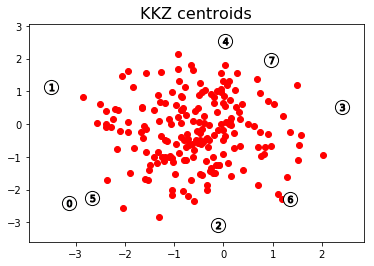

In [69]:
kkz_centroids = kkz(data, k, metric)

## K-means algorithm

As discussed in the introdution, K-means methods attempts to maximize the explained variance of an ensemble. It tends to select members that are representative of high-density regions. Furthermore, k-means cannot produce an ordered sequence of solutions, where a 6-member clustering recomendation  being  different to the 5-member clustering ones.

#### Straight K-Means
1. Initial setting. Choose the number of clusters, $K$, and tentative centroids $c_1 c_2 \dots c_K$, frequently referred to as seeds. Initial cluster lists $S_k$ is empty.

2. Clusters update. Given $K$ centroids, determine clusters $S_{k0} (k = 1 \dots K )$ with the Minimum Distance rule.

3. Stop-condition. Check whether $S_0 = S$ . If yes, end with clustering $S = S_k , c = ( c_k )$. Otherwise, change $S$ for $S_0$.

4. Centroids update. Given clusters $S_k$, calculate within cluster means $c_k ( k = 1 \dots K)$ and go to Step 2.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

def k_means(data, k):
    
    # Fitting data
    y = KMeans(n_clusters=k, random_state=seed).fit(data)

    # plotting
    plt.scatter(data[:, 0], data[:, 1], c='red')
    plt.title('K-means centroids', fontsize=16)
   
    # Draw white circles at cluster centers
    centers = y.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c='white', alpha=1, s=200, edgecolor='k')
    
    # Labeling the clusters
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # Show results
    plt.show()

    return centers

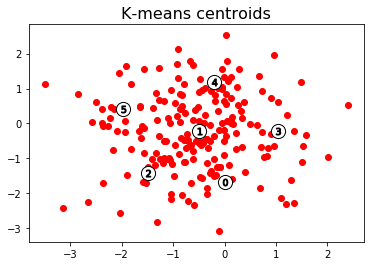

In [40]:
kmeans_centroids = k_means(data, k)

## Discussion

By the results from two plots we can see explicitly the different outcomes from both methods. 


While KKZ selects points which are more distant and covers better the spread of elements, K-Means select centroids aligned with more dense regions in the space. KKZ can represent the variability more then the density in some regions in the space. 


Once our aim is to select a good subset which represents the variability from the initial set, a good way to compare two methods is drawing the convex hull built by the centroids from both methods. It makes easy to compare how two methods catchs the variability while we increase K in each method. Lets plot the convex hull from two methods centroids

In [25]:
from scipy.spatial import Delaunay
from matplotlib.collections import PolyCollection, LineCollection
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def add_edge(i, j, edges, edge_points, hull):
    
    if (i, j) in edges or (j, i) in edges:
        return
    edges.add( (i, j) )
    edge_points.append(hull.points[ [i, j] ])
    
    return edges, edge_points
    

def plot_in_hull(points, hull):

    # Adjust types
    hull = Delaunay(hull)
    edges = set()
    edge_points = []
    
    # plot triangulation
    poly = PolyCollection(hull.points[hull.vertices], facecolors='w', edgecolors='b')
    plt.clf()
    plt.title('in hull')
    plt.gca().add_collection(poly)
    plt.plot(hull.points[:,0], hull.points[:,1], 'o')


    for ia, ib in hull.convex_hull:
        edges, edge_points = add_edge(ia, ib,  edges, edge_points, hull)

    lines = LineCollection(edge_points, color='g')
    plt.gca().add_collection(lines)

    # plot tested points `p` - black are inside hull, red outside
    inside = hull.find_simplex(points) >= 0
    plt.plot(points[ inside,0],points[ inside,1],'.k')
    plt.plot(points[~inside,0],points[~inside,1],'.r')
    plt.show()

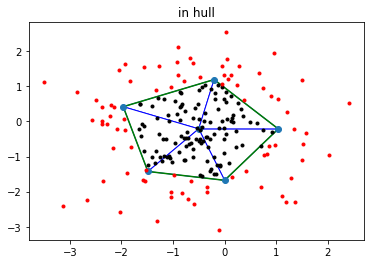

In [41]:
plot_in_hull(data, kmeans_centroids)

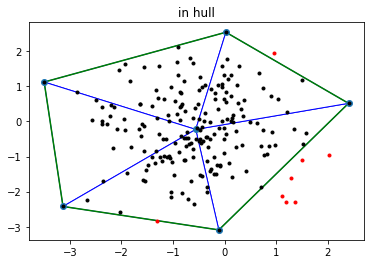

In [42]:
plot_in_hull(data, kkz_centroids)

The K-Means method covers 117 points from same 200 points from data set while the KKZ method cover 192 points from 200 available.
This means that working with just 5 elements it is possible replicates the variance of 200 elements mantaining same spread.  

## Conclusions

In this study two methods about to choose representative elements over a dataset were analysed. As figures visualy shows, while K-mean methods concentrate its centroids over more dense regions, KKZ in opposite, goes to extremes in the distributions. 

The KKZ characteristics are desirable when selecting elements which are most representatives in the total spread of values in a dataset. This kind of requirement arises in clima and weather studies where its necessary to select extreme elements in datasets where dense regions in subspace of solutions can create a bias in any extreme scenario. 

In next study this efficience in select a minimal subset of members which covers in the dataset spread in an optimal way will be analysed.